# Bootcamp 8: Practice with Pandas

This notebook is meant as a review of some of the more salient features of Pandas. To be clear, we will not be focusing on *reading in data*; rather, this notebook will focus more on using Pandas for selecting and analyzing data (using Pandas, of course). 

We’ll be using a data set of weather data from various weather stations around the US (`weather.csv`) over time. We are going to be exploring the average temperature in a few different states in different years.

## Part 0: Importing Packages and Reading in the Data

As a first step, let’s import the necessary packages and read in the data. Then, we'll use .head() to take a first look at the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

weather_data = pd.read_csv('weather.csv')
weather_data.head()

,Date_Month,Date_Year,Station_City,Station_State,Data_Temperature,Data_Precipitation
0,1,2016,Birmingham,Alabama,39,0.00
1,1,2016,Huntsville,Alabama,39,0.00
2,1,2016,Mobile,Alabama,46,0.16
3,1,2016,Montgomery,Alabama,45,0.00
4,1,2016,Anchorage,Alaska,34,0.01


**NOTE:** Sometimes, when you have a data file you are having trouble figuring out the column headers, you can use the pandas function `.keys()` to tell you the exact strings!

In [2]:
weather_data.keys()

Index(['Date_Month', 'Date_Year', 'Station_City', 'Station_State',
       'Data_Temperature', 'Data_Precipitation'],
      dtype='object')

## Part 1: Analyzing a Single State

#### 1.0 Filtering down to one year

You may have noticed that the dataframe contains weather station data from both 2016 and 2017, let's start by masking our dataframe to just include data from 2016.

In [3]:
# Filter the data with a mask

year_mask = weather_data['Date_Year']==2016
year_data = weather_data[year_mask]
year_data

,Date_Month,Date_Year,Station_City,Station_State,Data_Temperature,Data_Precipitation
0,1,2016,Birmingham,Alabama,39,0.00
1,1,2016,Huntsville,Alabama,39,0.00
2,1,2016,Mobile,Alabama,46,0.16
3,1,2016,Montgomery,Alabama,45,0.00
4,1,2016,Anchorage,Alaska,34,0.01
...,...,...,...,...,...,...
16421,12,2016,Casper,Wyoming,27,0.39
16422,12,2016,Cheyenne,Wyoming,34,0.04
16423,12,2016,Lander,Wyoming,19,0.33
16424,12,2016,Rawlins,Wyoming,27,0.36


#### 1.1
&#9989;&nbsp; **Pick a single state (from the column name `Station State`). Create a new dataframe that just contains that state**

In [4]:
# Write your code here
state_mask = year_data['Station_State']=="Florida"
fl2016_data = year_data[state_mask]
fl2016_data


,Date_Month,Date_Year,Station_City,Station_State,Data_Temperature,Data_Precipitation
72,1,2016,Daytona Beach,Florida,63,0.75
73,1,2016,Fort Lauderdale,Florida,76,0.49
74,1,2016,Gainesville,Florida,56,0.62
75,1,2016,Jacksonville,Florida,56,0.49
76,1,2016,Key West,Florida,79,0.50
...,...,...,...,...,...,...
16190,12,2016,Pensacola,Florida,58,0.18
16191,12,2016,Tallahassee,Florida,60,0.61
16192,12,2016,Tampa,Florida,71,0.00
16193,12,2016,Vero Beach,Florida,71,0.49


#### 1.2

Our ultimate goal is to see what the average temperature is for each month in our state's data. Using another mask, select one month from the `Date_Month` column. Then calculate the average temperature of the `Data_Temperature` column for that month.

In [10]:
# Write your code here
month_mask = fl2016_data['Date_Month']==8
flaugust2016_data = fl2016_data[month_mask]
flaugust2016_data.head()

,Date_Month,Date_Year,Station_City,Station_State,Data_Temperature,Data_Precipitation
9855,8,2016,Daytona Beach,Florida,84,0.16
9856,8,2016,Fort Lauderdale,Florida,83,2.75
9857,8,2016,Gainesville,Florida,81,1.58
9858,8,2016,Jacksonville,Florida,83,1.05
9859,8,2016,Key West,Florida,85,2.56


In [9]:
#average temperature of the data temperature for that month
np.average(flaugust2016_data['Data_Temperature'])

83.79166666666667

#### 1.3

&#9989;&nbsp; **Now repeat the process above (for your state), but for the other 11 months.** You can do this by making a new mask and new masked dataframe for each month, but try to do it in as compact a way as possible! Using a loop or a function would be a good way to approach it!

In [20]:
# Write your code here
for month in range(1,13,1):
    month_mask = fl2016_data['Date_Month']==month
    flaugust2016_data = fl2016_data[month_mask]
    np.average(flaugust2016_data['Data_Temperature'])
    print("The average temperature in Fahrenheit for the month in FL is: ")
    print(np.average(flaugust2016_data['Data_Temperature']))

The average temperature in Fahrenheit for the month in FL is: 
59.95
The average temperature in Fahrenheit for the month in FL is: 
61.5625
The average temperature in Fahrenheit for the month in FL is: 
69.85416666666667
The average temperature in Fahrenheit for the month in FL is: 
71.95833333333333
The average temperature in Fahrenheit for the month in FL is: 
77.45
The average temperature in Fahrenheit for the month in FL is: 
82.33333333333333
The average temperature in Fahrenheit for the month in FL is: 
84.4
The average temperature in Fahrenheit for the month in FL is: 
83.79166666666667
The average temperature in Fahrenheit for the month in FL is: 
82.25
The average temperature in Fahrenheit for the month in FL is: 
77.03333333333333
The average temperature in Fahrenheit for the month in FL is: 
68.8125
The average temperature in Fahrenheit for the month in FL is: 
68.66666666666667


In [26]:
FL_mask = year_data['Station_State'] == "Florida"
florida_data = year_data[FL_mask]

all_months_mean_fl = []
for month in range(1,13):
    df_temp = florida_data[florida_data['Date_Month'] == month]
    all_months_mean_fl.append(df_temp['Data_Temperature'].mean())
print(all_months_mean_fl)

[59.95, 61.5625, 69.85416666666667, 71.95833333333333, 77.45, 82.33333333333333, 84.4, 83.79166666666667, 82.25, 77.03333333333333, 68.8125, 68.66666666666667]


#### 1.4

&#9989;&nbsp; **Create a plot that visualizes the monthly average temperature for your state. Make sure to include all of the appropriate details in your plot!**

Text(0, 0.5, 'temperature')

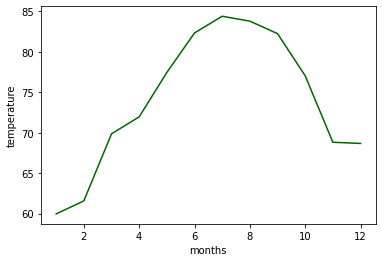

In [25]:
# put your answer here
import matplotlib.pyplot as plt

plt.plot(range(1,13),all_months_mean, color = "darkgreen")
plt.xlabel('months')
plt.ylabel('temperature')

#### 1.5

&#9989;&nbsp; **What do you notice about the average temperature across the months? Does it make sense to you, given the climate of the state you chose?**

### 2.0 Challenge Problem

&#9989;&nbsp; Now, we want to expand the above procedure to additional states. Bringing together all of your knowledge of loops, functions, pandas, and matplotlib, repeat the above process for one state for several other states. Try to do it using loops and/or functions to make your code compact and easier to debug! This is more challenging than what hsould be on a quiz but will let you practice alot of what you have learned up to this point!

In [36]:
#for the state of Virginia

year_mask = weather_data['Date_Year']==2016
year_data = weather_data[year_mask]
year_data

state_mask_va = year_data['Station_State']=="Virginia"
va2016_data = year_data[state_mask_va]

all_months_mean_va = []
for month in range(1,13):
    df_temp = va2016_data[va2016_data['Date_Month'] == month]
    all_months_mean_va.append(df_temp['Data_Temperature'].mean())

In [37]:
#for the state of Washington State

year_mask = weather_data['Date_Year']==2016
year_data = weather_data[year_mask]
year_data

state_mask_wa = year_data['Station_State']=="Washington"
wa2016_data = year_data[state_mask_wa]

all_months_mean_wa = []
for month in range(1,13):
    df_temp = wa2016_data[wa2016_data['Date_Month'] == month]
    all_months_mean_wa.append(df_temp['Data_Temperature'].mean())

In [38]:
#for the state of Georgia

year_mask = weather_data['Date_Year']==2016
year_data = weather_data[year_mask]
year_data

state_mask_ga = year_data['Station_State']=="Georgia"
ga2016_data = year_data[state_mask_ga]

all_months_mean_ga = []
for month in range(1,13):
    df_temp = ga2016_data[ga2016_data['Date_Month'] == month]
    all_months_mean_ga.append(df_temp['Data_Temperature'].mean())

Text(0.5, 1.0, 'average temperature for each month of several states')

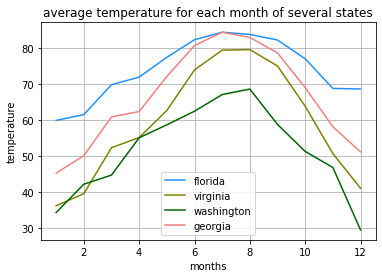

In [41]:
#ploting

plt.plot(range(1,13),all_months_mean_fl, label = "florida", color = "dodgerblue")
plt.plot(range(1,13),all_months_mean_va, label = "virginia", color = "olive")
plt.plot(range(1,13),all_months_mean_wa, label = "washington", color = "darkgreen")
plt.plot(range(1,13),all_months_mean_ga, label = "georgia", color = "lightcoral")

plt.grid()
plt.legend()
plt.xlabel('months')
plt.ylabel('temperature')
plt.title('average temperature for each month of several states')

Text(0, 0.5, 'temperature')

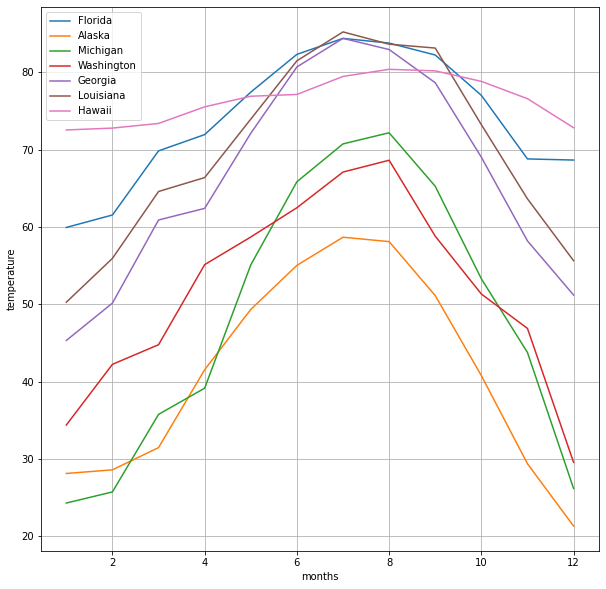

In [42]:
plt.figure(figsize=(10,10))
states = ['Florida','Alaska','Michigan','Washington','Georgia','Louisiana','Hawaii']

for state_name in states:
    state_mask = year_data['Station_State'] == state_name
    state_data = year_data[state_mask]
    all_months_mean = []
    for month in range(1,13):
        df_temp = state_data[state_data['Date_Month'] == month]
        all_months_mean.append(df_temp['Data_Temperature'].mean())
    plt.plot(range(1,13),all_months_mean,label=state_name)
    plt.legend()
    plt.grid()
plt.xlabel('months')
plt.ylabel('temperature')